In [ ]:
import torch

In [ ]:
torch.version.cuda

'11.6'

In [ ]:
device = torch.device('cuda')

In [ ]:
import torch
import tqdm as notebook_tqdm
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.linalg import eig

In [ ]:
data = pd.read_csv('banknotes.csv')

In [ ]:
data.head()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0,214.8,131.0,131.1,9.0,9.7,141.0
1,0,214.6,129.7,129.7,8.1,9.5,141.7
2,0,214.8,129.7,129.7,8.7,9.6,142.2
3,0,214.8,129.7,129.6,7.5,10.4,142.0
4,0,215.0,129.6,129.7,10.4,7.7,141.8


In [ ]:
data = data.sample(frac=1).reset_index(drop=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   conterfeit  200 non-null    int64  
 1   Length      200 non-null    float64
 2   Left        200 non-null    float64
 3   Right       200 non-null    float64
 4   Bottom      200 non-null    float64
 5   Top         200 non-null    float64
 6   Diagonal    200 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.1 KB


In [ ]:
y = data['conterfeit']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: conterfeit, dtype: int64

In [ ]:
X = data.drop('conterfeit',axis=1)
sc = StandardScaler()
x = sc.fit_transform(X)

In [ ]:
X.head()

,Length,Left,Right,Bottom,Top,Diagonal
0,214.7,130.1,130.2,11.6,10.9,139.1
1,215.1,130.3,130.3,9.8,9.5,141.9
2,215.0,130.2,130.2,10.6,10.7,139.9
3,214.9,130.4,129.7,9.0,9.8,140.9
4,215.7,130.8,130.5,9.0,10.1,141.4


In [ ]:
x

array([[-0.52181576, -0.05970201,  0.6041277 ,  1.5145868 ,  0.31151022,
        -1.20369089],
       [ 0.54311436,  0.49566556,  0.85222942,  0.26544305, -1.43644293,
         1.23240199],
       [ 0.27688183,  0.21798177,  0.6041277 ,  0.82061805,  0.06180263,
        -0.50766436],
       ...,
       [ 0.0106493 ,  1.05103313,  0.6041277 ,  0.82061805,  1.06063301,
        -0.50766436],
       [ 0.54311436,  0.21798177, -0.3882792 ,  0.54303055,  1.68490199,
        -0.94268094],
       [ 1.34181195, -0.89275337, -1.3806861 , -0.9837007 , -0.06305117,
         0.88438872]])

In [ ]:
PyData = torch.tensor(x,dtype = torch.float32)
PyY = torch.tensor(y)

In [ ]:
PyData.device, PyY.device

(device(type='cpu'), device(type='cpu'))

In [ ]:
PyData = PyData.to(device)
PyY = PyY.to(device)

In [ ]:
PyData.device, PyY.device

(device(type='cuda', index=0), device(type='cuda', index=0))

In [ ]:
# PyData_mean = torch.mean(PyData, dim=0)
# PyData_centered = PyData - PyData_mean

In [ ]:
pca = torch.pca_lowrank(PyData)

In [ ]:
pca

(tensor([[ 0.0657, -0.0660,  0.0439,  0.0613, -0.0496, -0.0231],
         [-0.0159,  0.0767,  0.1193, -0.0827, -0.0544,  0.0216],
         [ 0.0412,  0.0056,  0.0352,  0.0369, -0.0362, -0.0114],
         ...,
         [ 0.0725,  0.0041, -0.0175, -0.0023,  0.0086,  0.0984],
         [ 0.0501, -0.0086, -0.0874,  0.1231,  0.0244,  0.0887],
         [-0.0807,  0.0594, -0.0539,  0.1020,  0.0168,  0.0410]],
        device='cuda:0'),
 tensor([24.2716, 15.9880, 13.1836,  9.4844,  7.3304,  6.1462], device='cuda:0'),
 tensor([[-0.0070,  0.8155, -0.0177,  0.5746, -0.0588, -0.0311],
         [ 0.4678,  0.3420,  0.1034, -0.3949,  0.6395,  0.2977],
         [ 0.4867,  0.2525,  0.1235, -0.4303, -0.6141, -0.3492],
         [ 0.4068, -0.2662,  0.5835,  0.4037, -0.2155,  0.4624],
         [ 0.3679, -0.0915, -0.7876,  0.1102, -0.2198,  0.4190],
         [-0.4935,  0.2739,  0.1139, -0.3919, -0.3402,  0.6318]],
        device='cuda:0'))

In [ ]:
pca_x = pca[0][:,:5]

In [ ]:
X_train = pca_x[:160]
X_test = pca_x[-40:]

In [ ]:
X_test.shape

torch.Size([40, 5])

In [ ]:
y_train = PyY[:160]
y_test = PyY[-40:]

In [ ]:
y_test

tensor([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0], device='cuda:0')

In [ ]:
from collections import OrderedDict
import torch.nn as nn

In [ ]:
def model(infet=5,hiddDim=8,nbClass=2):
  model = nn.Sequential(
      OrderedDict([
          ('hiddenLayer1', nn.Linear(infet,hiddDim)),
          ('activation1',nn.ReLU()),
          ("output_layer", nn.Linear(hiddDim, nbClass))
      ])
  )

  return model

In [ ]:
model1 = model()
mlp = model1.to(device)
mlp

Sequential(
  (hiddenLayer1): Linear(in_features=5, out_features=8, bias=True)
  (activation1): ReLU()
  (output_layer): Linear(in_features=8, out_features=2, bias=True)
)

In [ ]:
# from pyimagesearch import mlp
from torch.optim import SGD
from sklearn.model_selection import train_test_split
# from sklearn.datasets import make_blobs

In [ ]:
opt = SGD(mlp.parameters(),lr=1e-2)
lossFunc = nn.CrossEntropyLoss()

In [ ]:
EPOCHS = 300
BATCH_SIZE = 10

In [ ]:
def next_batch(inputs, targets, batchSize):
	# loop over the dataset
	for i in range(0, inputs.shape[0], batchSize):
		# yield a tuple of the current batched data and labels
		yield (inputs[i:i + batchSize], targets[i:i + batchSize])

In [ ]:
for epoch in range(0, EPOCHS):
	# initialize tracker variables and set our model to trainable
	print("[INFO] epoch: {}...".format(epoch + 1))
	trainLoss = 0
	trainAcc = 0
	samples = 0
	mlp.train()
	# loop over the current batch of data
	for (batchX, batchY) in next_batch(X_train, y_train, BATCH_SIZE):
		# flash data to the current device, run it through our
		# model, and calculate loss
		(batchX, batchY) = (batchX.to(device), batchY.to(device))
		predictions = mlp(batchX)
		loss = lossFunc(predictions, batchY.long())
		# zero the gradients accumulated from the previous steps,
		# perform backpropagation, and update model parameters
		opt.zero_grad()
		loss.backward()
		opt.step()
		# update training loss, accuracy, and the number of samples
		# visited
		trainLoss += loss.item() * batchY.size(0)
		trainAcc += (predictions.max(1)[1] == batchY).sum().item()
		samples += batchY.size(0)
	# display model progress on the current training batch
	trainTemplate = "epoch: {} train loss: {:.3f} train accuracy: {:.3f}"
	print(trainTemplate.format(epoch + 1, (trainLoss / samples),
		(trainAcc / samples)))

[INFO] epoch: 1...
epoch: 1 train loss: 0.696 train accuracy: 0.512
[INFO] epoch: 2...
epoch: 2 train loss: 0.696 train accuracy: 0.512
[INFO] epoch: 3...
epoch: 3 train loss: 0.696 train accuracy: 0.512
[INFO] epoch: 4...
epoch: 4 train loss: 0.696 train accuracy: 0.512
[INFO] epoch: 5...
epoch: 5 train loss: 0.696 train accuracy: 0.512
[INFO] epoch: 6...
epoch: 6 train loss: 0.696 train accuracy: 0.512
[INFO] epoch: 7...
epoch: 7 train loss: 0.696 train accuracy: 0.512
[INFO] epoch: 8...
epoch: 8 train loss: 0.696 train accuracy: 0.512
[INFO] epoch: 9...
epoch: 9 train loss: 0.696 train accuracy: 0.512
[INFO] epoch: 10...
epoch: 10 train loss: 0.695 train accuracy: 0.512
[INFO] epoch: 11...
epoch: 11 train loss: 0.695 train accuracy: 0.512
[INFO] epoch: 12...
epoch: 12 train loss: 0.695 train accuracy: 0.512
[INFO] epoch: 13...
epoch: 13 train loss: 0.695 train accuracy: 0.512
[INFO] epoch: 14...
epoch: 14 train loss: 0.695 train accuracy: 0.512
[INFO] epoch: 15...
epoch: 15 train lo

In [ ]:
pred = mlp(X_test)

In [ ]:
pred = pred.max(1)[1]
pred

tensor([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0], device='cuda:0')

In [ ]:
y_test

tensor([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0], device='cuda:0')

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
y_true = y_test.to('cpu')
y_pred = pred.to('cpu')
y_true

tensor([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0])

In [ ]:
y_true = y_true.numpy()
y_pred = y_pred.numpy()

In [ ]:
cf_matrix = confusion_matrix(y_true, y_pred)
cf_matrix

array([[21,  1],
       [ 0, 18]])

In [ ]:
classes = ['Not Counterfiet','Counterfiet']

<Axes: >

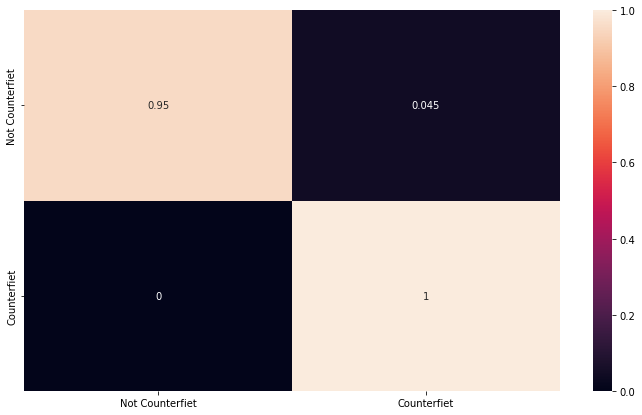

In [ ]:
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)